In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
import datetime

plt.style.use('ggplot')


In [2]:
## load in dataset

data = pd.read_csv('data-2.csv')

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
## quickly check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
## lets check for missing values

data.isnull().sum().sort_values()

InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
Description      1454
CustomerID     135080
dtype: int64

In [5]:
#invocedate is object type, convert to time

data['InvoiceDate'] = pd.to_datetime(data.InvoiceDate, format='%m/%d/%Y %H:%M')

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
## lets check data info again

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
## lets drop missing rows and save in new dataframe

data_nms = data.dropna()

In [8]:
data_nms.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
##check for missing value
data_nms.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
data_nms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [11]:
## customerID needs to be a int datatype

data_nms['CustomerID'] = data_nms['CustomerID'].astype('int64')

C:\Users\Timileyin\AppData\Local\Temp\ipykernel_7796\2995916737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nms['CustomerID'] = data_nms['CustomerID'].astype('int64')


In [12]:
data_nms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [13]:
data_nms.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [14]:
## lets check the statistics of the data

data_nms.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


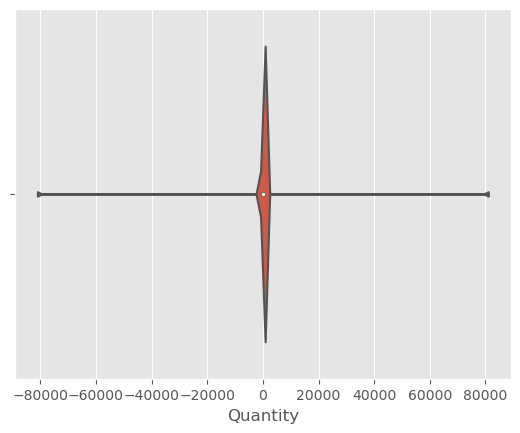

In [15]:
## there is a negative minimun quantity ordered which is abnormal

## lets plot violin plot to check what happened

ax = sns.violinplot(x=data_nms['Quantity'])

In [16]:
# we can remove the row with the negative quantity

data_nms = data_nms[data_nms.Quantity > 0]

In [17]:
data_nms.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [18]:
## lets create the amount spent for each transactions

data_nms['AmountSpent'] = data_nms['UnitPrice'] * data_nms['Quantity']

data_nms.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [19]:
## lets create year, month, day, columns

data_nms['year_month'] = data_nms['InvoiceDate'].dt.to_period('M')
data_nms.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


In [20]:
## year

data_nms['year'] = data_nms['InvoiceDate'].dt.year 
data_nms['month'] = data_nms['InvoiceDate'].dt.month
data_nms['day'] = data_nms['InvoiceDate'].dt.day
data_nms['dayofweek'] = data_nms['InvoiceDate'].dt.day_of_week
data_nms['dayofyear'] = data_nms['InvoiceDate'].dt.day_of_year
data_nms['weekofyear'] = data_nms['InvoiceDate'].dt.week
data_nms['quarter'] = data_nms['InvoiceDate'].dt.quarter 

C:\Users\Timileyin\AppData\Local\Temp\ipykernel_7796\1107816316.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_nms['weekofyear'] = data_nms['InvoiceDate'].dt.week


In [21]:
data_nms.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year_month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,2,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,2,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4


In [22]:
#day of week starts at 0 as oppose to 1

data_nms.dayofweek.unique()

array([2, 3, 4, 6, 0, 1], dtype=int64)

In [23]:
##add 1 to each value

data_nms['dayofweek'] = data_nms['dayofweek'] + 1

In [24]:
data_nms.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year_month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


In [25]:
data_nms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int64         
 7   Country      397924 non-null  object        
 8   AmountSpent  397924 non-null  float64       
 9   year_month   397924 non-null  period[M]     
 10  year         397924 non-null  int64         
 11  month        397924 non-null  int64         
 12  day          397924 non-null  int64         
 13  dayofweek    397924 non-null  int64         
 14  dayofyear    397924 non-null  int64         
 15  weekofyear   397924 non-null  int6

### Data Analysis

In [26]:
## data segregation and grouping

## lets group the data according to customerID and country

customer_sales = data_nms.groupby(by=['CustomerID', 'Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)

##create new column name

customer_sales.columns = ['CustomerID', 'Country', 'NoofPurchases']

customer_sales.head()

,CustomerID,Country,NoofPurchases
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


In [27]:
## customer, country and amount spent

customer_amount = data_nms.groupby(by=['CustomerID', 'Country'], as_index=False)['AmountSpent'].sum().sort_values(by='AmountSpent', ascending=False)

##create new column name

customer_amount.columns = ['CustomerID', 'Country', 'TotalMoneySpent']

customer_amount.head()

,CustomerID,Country,TotalMoneySpent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


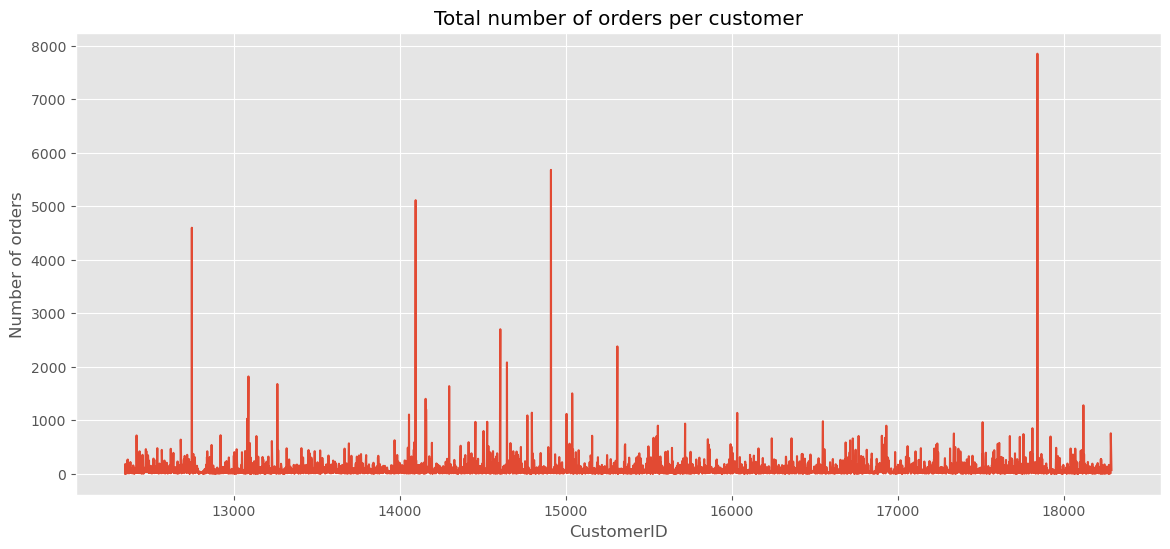

In [28]:
## visualize orders per customer
sales = data_nms.groupby(by=['CustomerID', 'Country'], as_index=False)['InvoiceNo'].count()

plt.figure(figsize=(14, 6))
plt.plot(sales.CustomerID, sales.InvoiceNo)
plt.ylabel("Number of orders")
plt.xlabel("CustomerID")
plt.title("Total number of orders per customer")

plt.show()

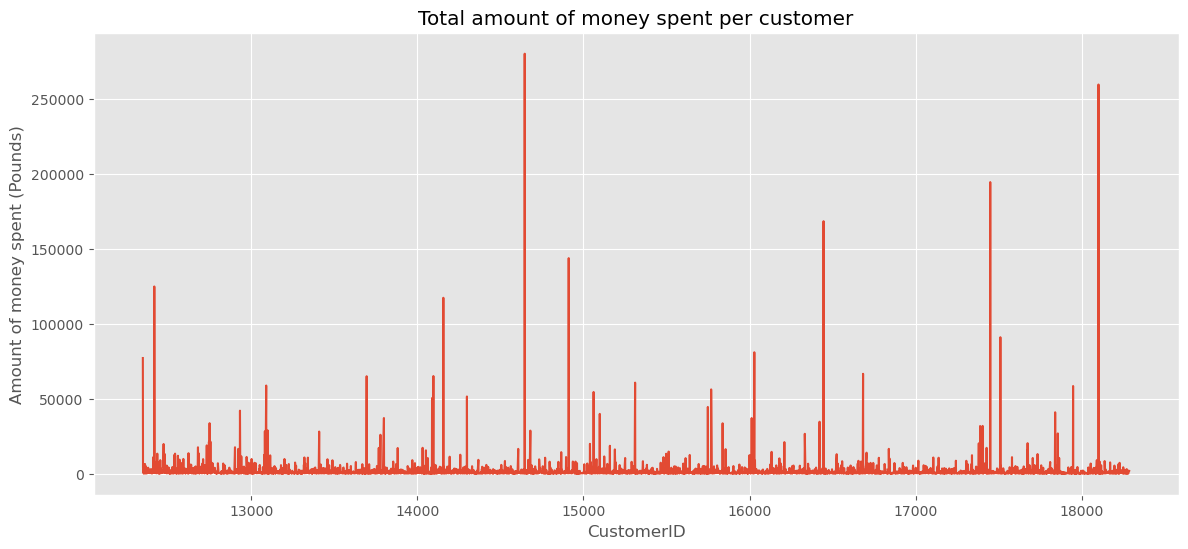

In [29]:
## likewise lets get amount spent by these customers

amount_spent = data_nms.groupby(by=['CustomerID', 'Country'], as_index=False)['AmountSpent'].sum()

plt.figure(figsize=(14, 6))
plt.plot(amount_spent.CustomerID, amount_spent.AmountSpent)
plt.ylabel("Amount of money spent (Pounds)")
plt.xlabel("CustomerID")
plt.title("Total amount of money spent per customer")

plt.show()

### Analysis of the purchasing pattern

In [30]:
data_nms.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year_month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


In [31]:
## lets insert 2 new columns, hour and yearmonth

data_nms.insert(loc=2, column='yearmonth', value=data_nms['InvoiceDate'].map(lambda x: 100*x.year + x.month))

data_nms.insert(loc=5, column='hour', value=data_nms['InvoiceDate'].dt.hour)

In [32]:
data_nms.head()

,InvoiceNo,StockCode,yearmonth,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year_month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,8,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,201012,WHITE METAL LANTERN,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


In [33]:
## lets plot order/month

order_month = data_nms.groupby('InvoiceNo')['yearmonth'].unique().value_counts().sort_index()
order_month

[201012]    1400
[201101]     987
[201102]     998
[201103]    1321
[201104]    1149
[201105]    1555
[201106]    1393
[201107]    1331
[201108]    1281
[201109]    1756
[201110]    1929
[201111]    2658
[201112]     778
Name: yearmonth, dtype: int64

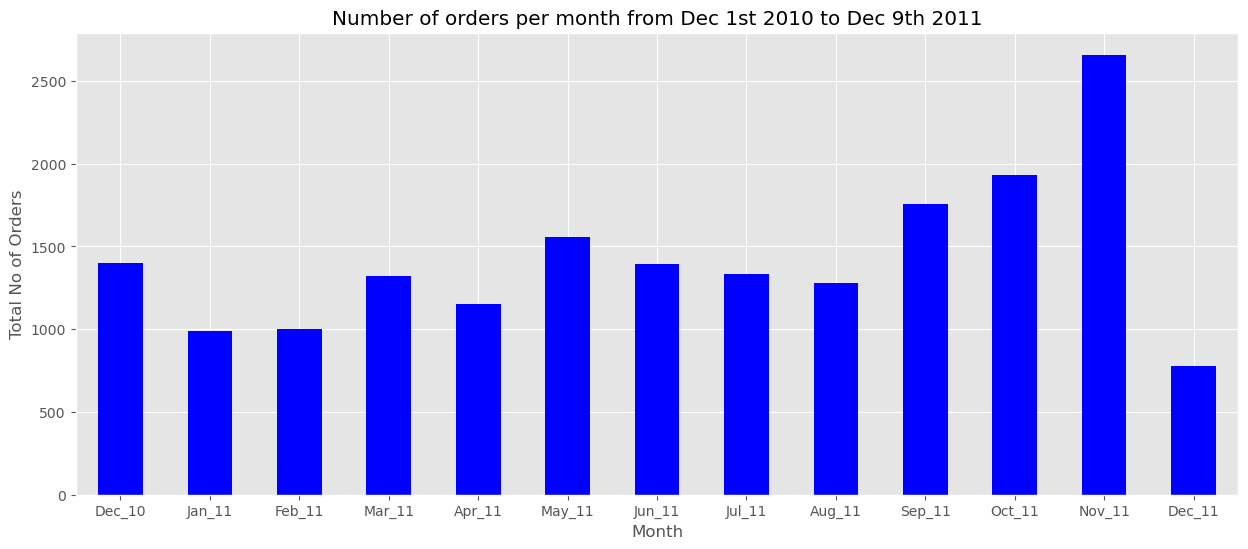

In [34]:
labels = ['Dec_10', 'Jan_11', 'Feb_11', 'Mar_11', 'Apr_11', 'May_11', 'Jun_11', 'Jul_11', 'Aug_11', 'Sep_11', 'Oct_11', 'Nov_11', 'Dec_11']
ax = order_month.plot(kind='bar', color='blue', figsize=(15, 6))
ax.set_ylabel('Total No of Orders', fontsize= 12)
ax.set_xlabel('Month', fontsize= 12)
ax.set_title('Number of orders per month from Dec 1st 2010 to Dec 9th 2011')
ax.set_xticklabels(labels, rotation='horizontal')
plt.show()

In [35]:
## number of orders per week

order_week = data_nms.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index()
order_week

[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: dayofweek, dtype: int64

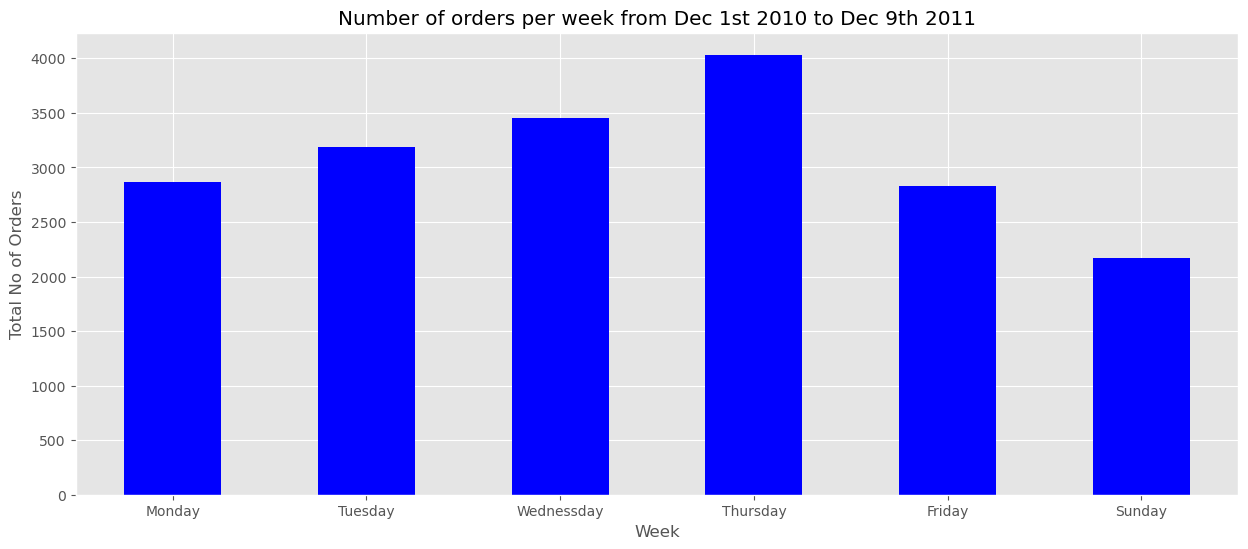

In [36]:
## lets plot this

labels = ['Monday', 'Tuesday', 'Wednessday', 'Thursday', 'Friday', 'Sunday']
ax = order_week.plot(kind='bar', color='blue', figsize=(15, 6))
ax.set_ylabel('Total No of Orders', fontsize= 12)
ax.set_xlabel('Week', fontsize= 12)
ax.set_title('Number of orders per week from Dec 1st 2010 to Dec 9th 2011')
ax.set_xticklabels(labels, rotation='horizontal')
plt.show()

In [37]:
## lets check our orders per hour

order_hour = data_nms.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:14].sort_index()
order_hour

[7]       29
[8]      555
[9]     1394
[10]    2226
[11]    2276
[12]    3129
[13]    2637
[14]    2275
[15]    2038
[16]    1100
[17]     544
[18]     169
[19]     144
[20]      18
Name: hour, dtype: int64

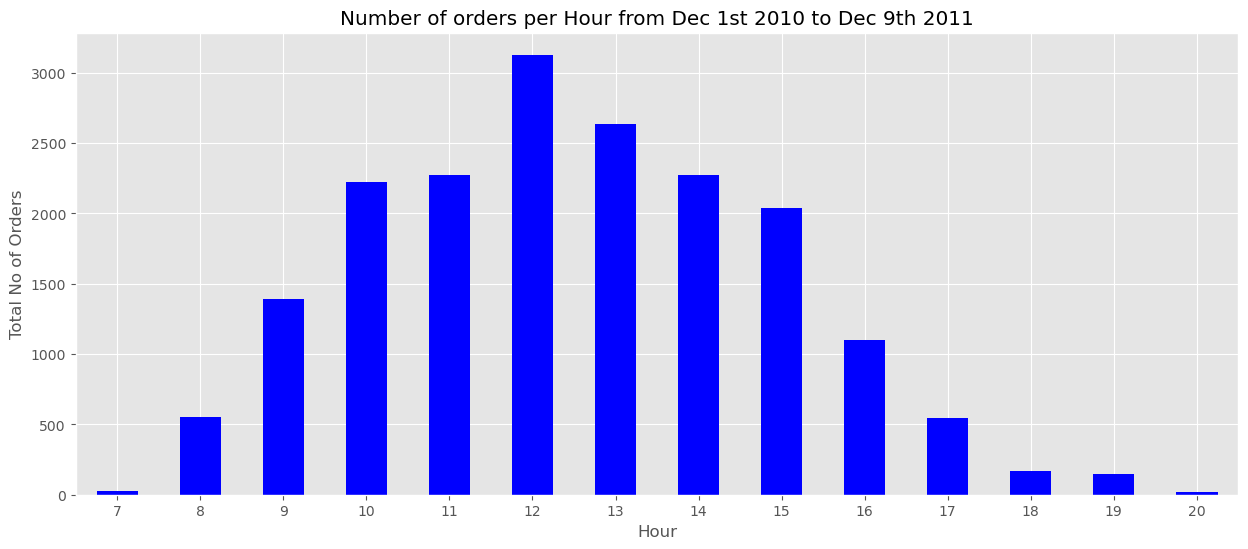

In [38]:
## lets plot this

ax = order_hour.plot(kind='bar', color='blue', figsize=(15, 6))
ax.set_ylabel('Total No of Orders', fontsize= 12)
ax.set_xlabel('Hour', fontsize= 12)
ax.set_title('Number of orders per Hour from Dec 1st 2010 to Dec 9th 2011')
ax.set_xticklabels(range (7,21), rotation='horizontal')
plt.show()

In [39]:
## number of sales per weeks for the year

order_weekyear = data_nms.groupby('InvoiceNo')['weekofyear'].unique().value_counts().sort_index()
order_weekyear

[1]      224
[2]      233
[3]      206
[4]      267
[5]      272
[6]      198
[7]      267
[8]      267
[9]      267
[10]     269
[11]     304
[12]     299
[13]     320
[14]     295
[15]     344
[16]     248
[17]     193
[18]     343
[19]     387
[20]     429
[21]     327
[22]     238
[23]     373
[24]     341
[25]     304
[26]     255
[27]     310
[28]     305
[29]     325
[30]     324
[31]     302
[32]     256
[33]     309
[34]     349
[35]     254
[36]     379
[37]     347
[38]     447
[39]     428
[40]     472
[41]     429
[42]     429
[43]     502
[44]     510
[45]     608
[46]     669
[47]     595
[48]    1035
[49]     973
[50]     401
[51]     108
Name: weekofyear, dtype: int64

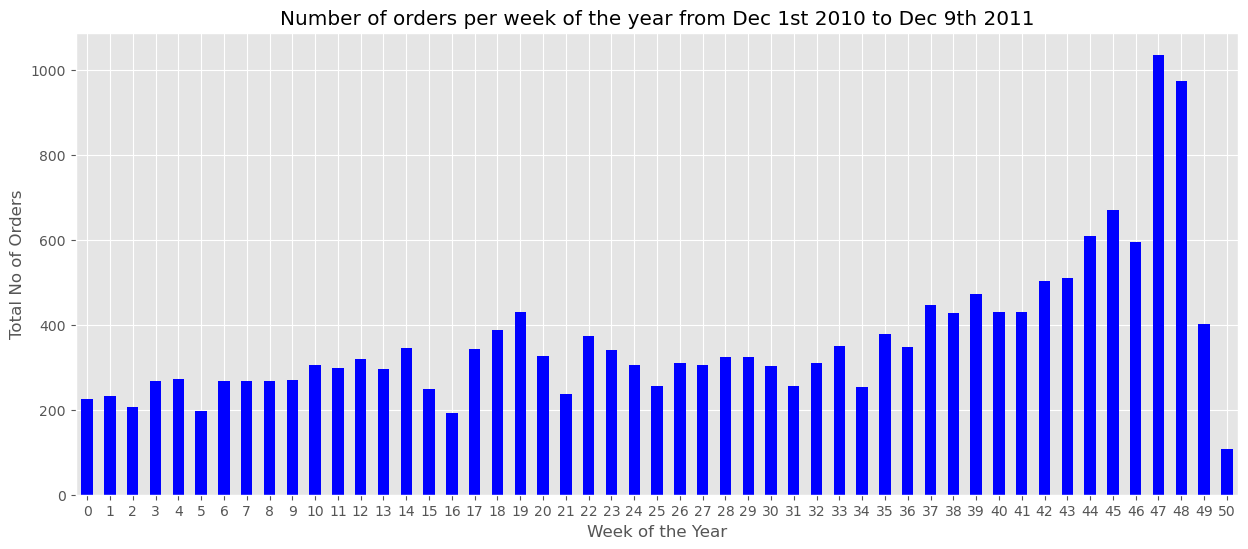

In [40]:
## lets plot this

ax = order_weekyear.plot(kind='bar', color='blue', figsize=(15, 6))
ax.set_ylabel('Total No of Orders', fontsize= 12)
ax.set_xlabel('Week of the Year', fontsize= 12)
ax.set_title('Number of orders per week of the year from Dec 1st 2010 to Dec 9th 2011')
ax.set_xticklabels(range (0, 51), rotation='horizontal')
plt.show()

### Price Annalysis

In [41]:
## lets check how the unit price is

data_nms.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

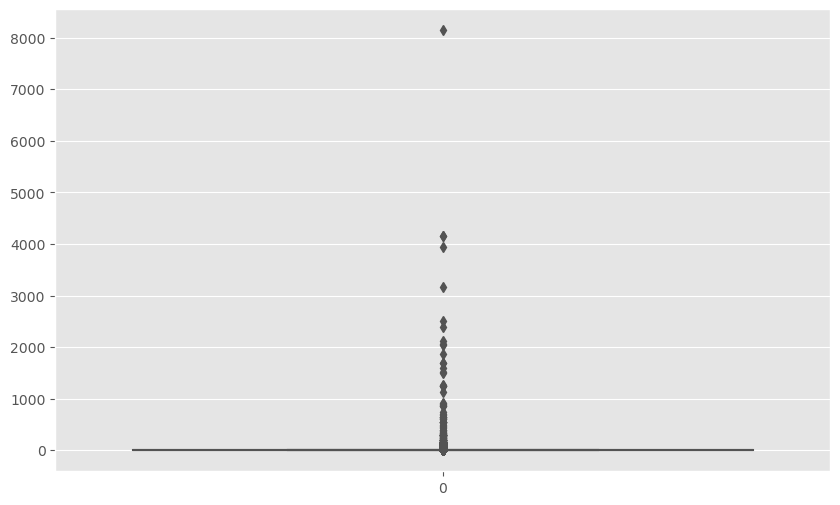

In [42]:
##boxplot of these values

plt.figure(figsize=(10, 6))
sns.boxplot(data_nms.UnitPrice)
plt.show()

In [43]:
## we have some items given away for 0

free_products = data_nms [data_nms['UnitPrice'] == 0]
free_products.head()

,InvoiceNo,StockCode,yearmonth,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year_month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
9302,537197,22841,201012,ROUND CAKE TIN VINTAGE GREEN,1,14,2010-12-05 14:02:00,0.0,12647,Germany,0.0,2010-12,2010,12,5,7,339,48,4
33576,539263,22580,201012,ADVENT CALENDAR GINGHAM SACK,4,14,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0,2010-12,2010,12,16,4,350,50,4
40089,539722,22423,201012,REGENCY CAKESTAND 3 TIER,10,13,2010-12-21 13:45:00,0.0,14911,EIRE,0.0,2010-12,2010,12,21,2,355,51,4
47068,540372,22090,201101,PAPER BUNTING RETROSPOT,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,4,6,1,1
47070,540372,22553,201101,PLASTERS IN TIN SKULLS,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,4,6,1,1


In [44]:
## total number free products

len(free_products)

40

In [45]:
## lets plot to see when these products are given away

free_campaingn = free_products.yearmonth.value_counts().sort_index()
free_campaingn

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: yearmonth, dtype: int64

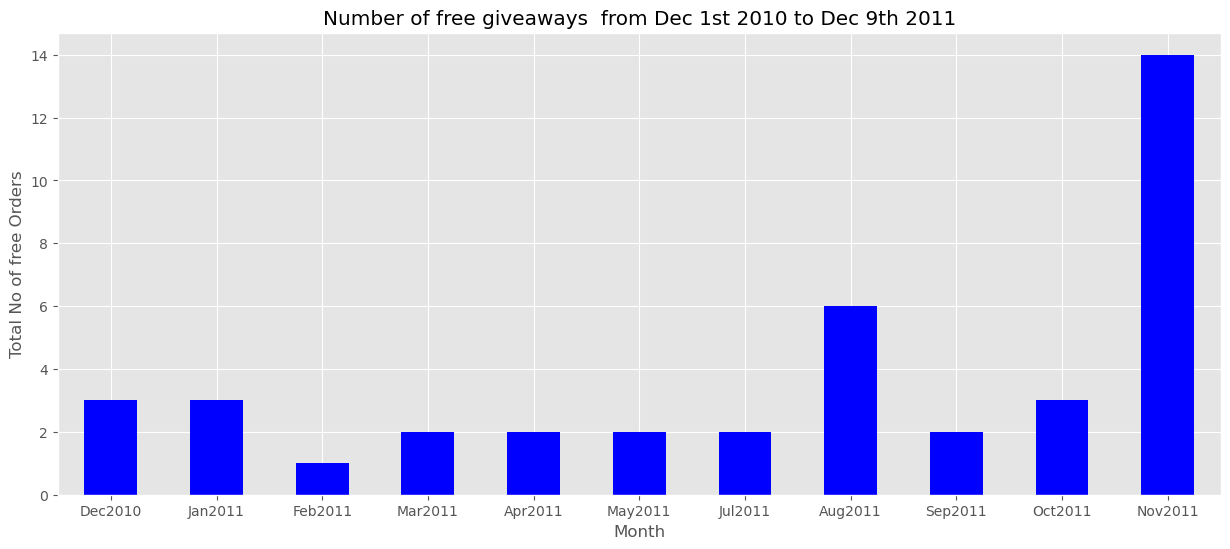

In [46]:
# a plot

## lets plot this
labels = ['Dec2010', 'Jan2011', 'Feb2011', 'Mar2011', 'Apr2011', 'May2011', 'Jul2011', 'Aug2011', 'Sep2011', 'Oct2011', 'Nov2011']
ax = free_campaingn.plot(kind='bar', color='blue', figsize=(15, 6))
ax.set_ylabel('Total No of free Orders', fontsize= 12)
ax.set_xlabel('Month', fontsize= 12)
ax.set_title('Number of free giveaways  from Dec 1st 2010 to Dec 9th 2011')
ax.set_xticklabels(labels, rotation='horizontal')
plt.show()

### Analysis according to country

In [47]:
data_nms.head()

,InvoiceNo,StockCode,yearmonth,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year_month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,8,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,201012,WHITE METAL LANTERN,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


In [48]:
orders_country = data_nms.groupby('Country')['InvoiceNo'].count().sort_values()
orders_country

Country
Saudi Arabia                 9
Bahrain                     17
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Unspecified                244
Israel                     248
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Sweden                     451
Cyprus                     614
Finland                    685
Channel Islands            748
Italy                      758
Norway                    1072
Australia                 1185
Portugal                  1462
Switzerland               1842
Belgium                   2031
Netherlands               2363


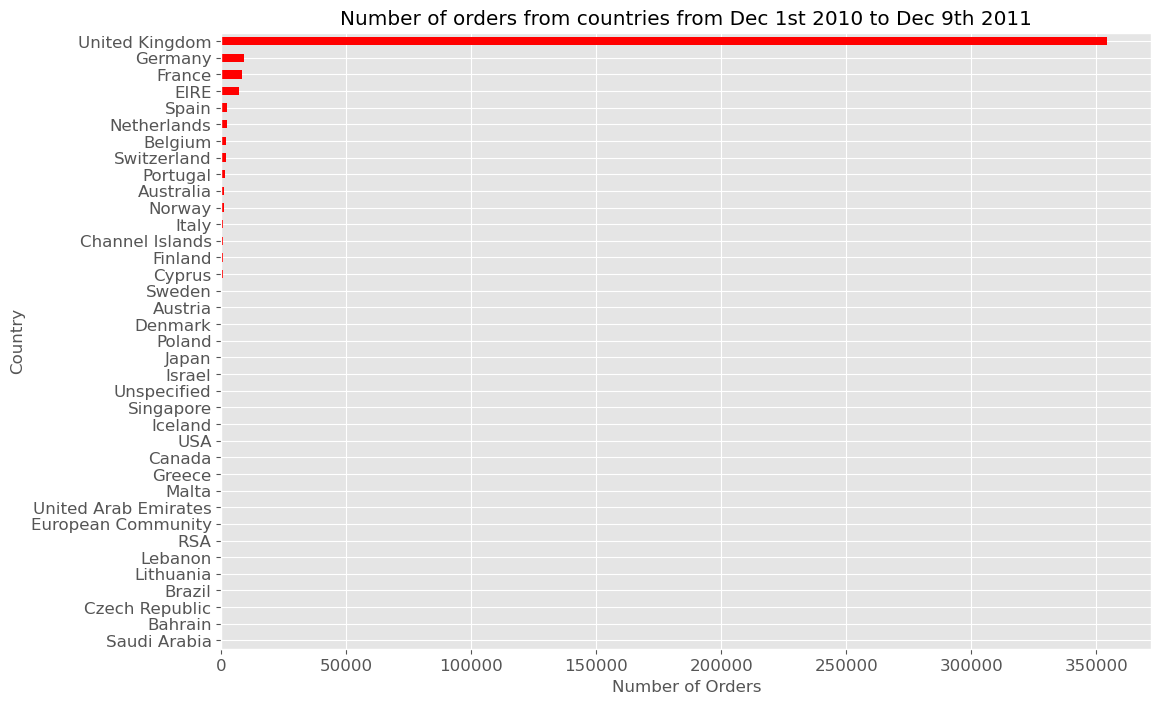

In [49]:

## lets plot this
plt.figure(figsize=(12, 8))
orders_country.plot(kind='barh', color='red', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of orders from countries from Dec 1st 2010 to Dec 9th 2011')
plt.show()

In [50]:
## to get more insights on how the countries perform lets exclude UK

orders_country_noUK = orders_country.copy()
del orders_country_noUK['United Kingdom']

In [51]:
orders_country_noUK

Country
Saudi Arabia               9
Bahrain                   17
Czech Republic            25
Brazil                    32
Lithuania                 35
Lebanon                   45
RSA                       58
European Community        60
United Arab Emirates      68
Malta                    112
Greece                   145
Canada                   151
USA                      179
Iceland                  182
Singapore                222
Unspecified              244
Israel                   248
Japan                    321
Poland                   330
Denmark                  380
Austria                  398
Sweden                   451
Cyprus                   614
Finland                  685
Channel Islands          748
Italy                    758
Norway                  1072
Australia               1185
Portugal                1462
Switzerland             1842
Belgium                 2031
Netherlands             2363
Spain                   2485
EIRE                    7238
France

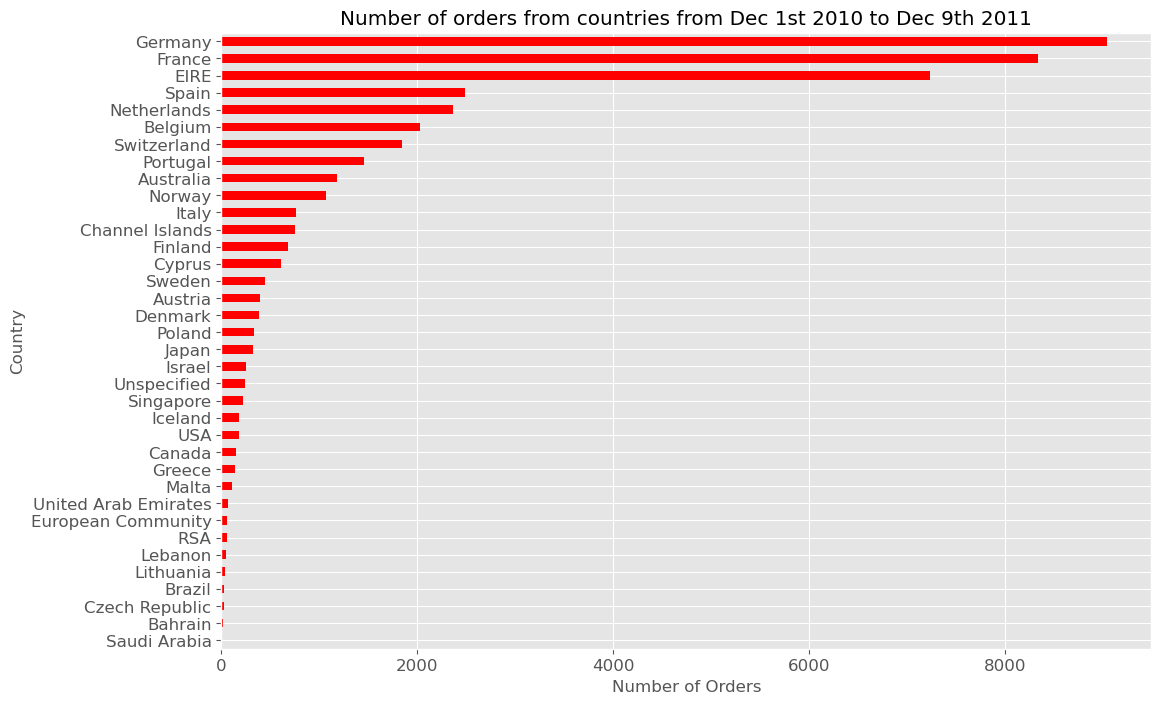

In [52]:

## lets plot this
plt.figure(figsize=(12, 8))
orders_country_noUK.plot(kind='barh', color='red', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of orders from countries from Dec 1st 2010 to Dec 9th 2011')
plt.show()

In [53]:
## let get the amount spent by these countries excluding the UK

amount_spent_country = data_nms.groupby('Country')['AmountSpent'].sum().sort_values()
del amount_spent_country['United Kingdom']

amount_spent_country

Country
Saudi Arabia               145.92
Bahrain                    548.40
Czech Republic             826.74
RSA                       1002.31
Brazil                    1143.60
European Community        1300.25
Lithuania                 1661.06
Lebanon                   1693.88
United Arab Emirates      1902.28
Unspecified               2667.07
Malta                     2725.59
USA                       3580.39
Canada                    3666.38
Iceland                   4310.00
Greece                    4760.52
Israel                    7221.69
Poland                    7334.65
Austria                  10198.68
Cyprus                   13590.38
Italy                    17483.24
Denmark                  18955.34
Channel Islands          20450.44
Singapore                21279.29
Finland                  22546.08
Portugal                 33439.89
Norway                   36165.44
Japan                    37416.37
Sweden                   38378.33
Belgium                  41196.34
Switze

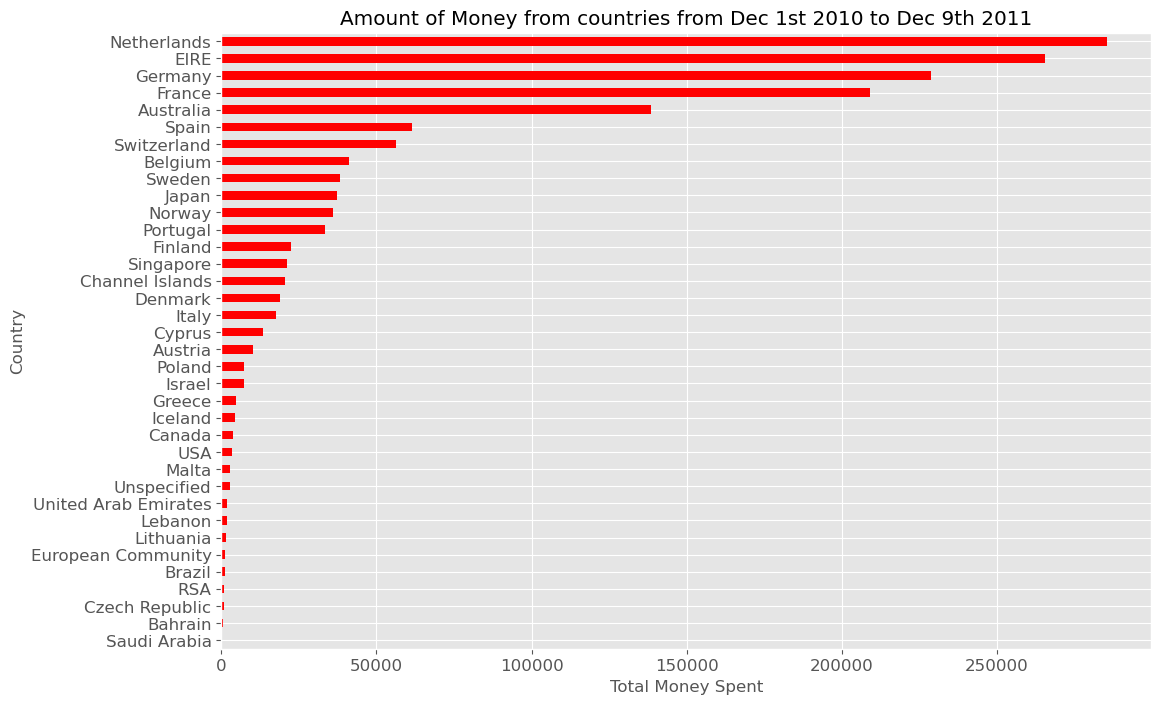

In [54]:
## lets plot this
plt.figure(figsize=(12, 8))
amount_spent_country.plot(kind='barh', color='red', fontsize=12)
plt.xlabel('Total Money Spent', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Amount of Money from countries from Dec 1st 2010 to Dec 9th 2011')
plt.show()

### Customer Analysis

In [55]:
## Lets set the date range of our analysis

print(data_nms['InvoiceDate'].min())
print(data_nms['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [56]:
# lets set our analysis to end at 2011-11-31 as December is not complete

customer_df = data_nms.loc[data_nms['InvoiceDate'] < '2011-12-01']


In [57]:
## Amount spent per invoice accoridng to customerID and Country

customer_invoice_df = customer_df.groupby(by=['InvoiceNo', 'InvoiceDate']).agg({'CustomerID': max, 'AmountSpent': sum, 'Country': max}).reset_index()

customer_invoice_df.head()

,InvoiceNo,InvoiceDate,CustomerID,AmountSpent,Country
0,536365,2010-12-01 08:26:00,17850,139.12,United Kingdom
1,536366,2010-12-01 08:28:00,17850,22.20,United Kingdom
2,536367,2010-12-01 08:34:00,13047,278.73,United Kingdom
3,536368,2010-12-01 08:34:00,13047,70.05,United Kingdom
4,536369,2010-12-01 08:35:00,13047,17.85,United Kingdom


In [58]:
## lets get the top spenders or transactions

customer_invoice_df.sort_values(by='AmountSpent', ascending=False).head(15)

,InvoiceNo,InvoiceDate,CustomerID,AmountSpent,Country
1911,541431,2011-01-18 10:01:00,12346,77183.60,United Kingdom
7949,556444,2011-06-10 15:28:00,15098,38970.00,United Kingdom
12446,567423,2011-09-20 11:05:00,17450,31698.16,United Kingdom
8135,556917,2011-06-15 13:37:00,12415,22775.93,Australia
14487,572209,2011-10-21 12:08:00,18102,22206.00,United Kingdom
12438,567381,2011-09-20 10:12:00,17450,22104.80,United Kingdom
10869,563614,2011-08-18 08:51:00,12415,21880.44,Australia
5481,550461,2011-04-18 13:20:00,15749,21535.90,United Kingdom
14399,572035,2011-10-20 12:03:00,14646,20277.92,Netherlands
10637,563076,2011-08-11 16:12:00,14646,19150.66,Netherlands


In [59]:
## lets get number of unique customers we get per month
monthly_distinct_customer = customer_df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
monthly_distinct_customer

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [60]:
##Now let get the number of repeat customers per month(i.e, have more than 1 order)

monthly_repeat_customer = customer_invoice_df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

monthly_repeat_customer 

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [61]:
#lets get the percentage monthly repeat

monthly_repeat_percent = (monthly_repeat_customer / monthly_distinct_customer) * 100
monthly_repeat_percent

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

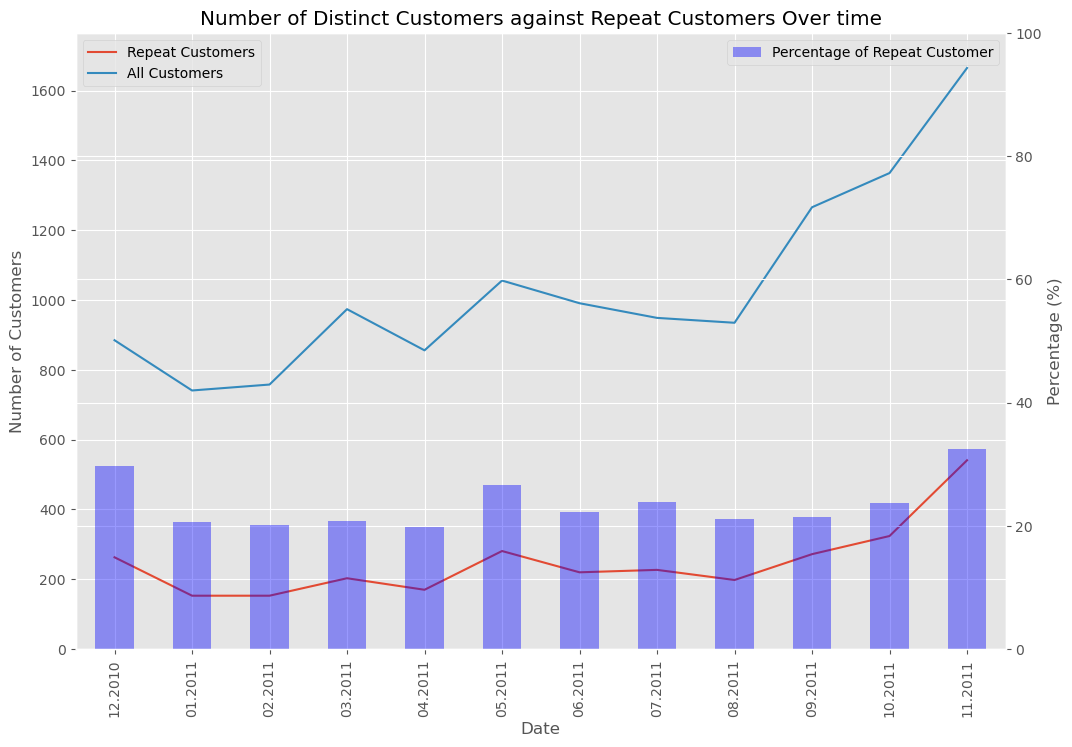

In [62]:
## lets plot these 3 on a chart

ax = pd.DataFrame(monthly_repeat_customer.values).plot(figsize= (12, 8)) ##montly repeat customer line

pd.DataFrame(monthly_distinct_customer.values).plot(ax=ax, grid=True) # add monthly distinct customer on the same figure

ax2 = pd.DataFrame(monthly_repeat_percent.values).plot.bar(ax=ax, grid=True, secondary_y = True, color='blue', alpha=0.4)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Customers')
ax.set_title("Number of Distinct Customers against Repeat Customers Over time")

ax2.set_ylabel('Percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat Customer'], loc='upper right')

ax.set_ylim([0, monthly_distinct_customer.values.max() + 100])
ax2.set_ylim([0, 100])

plt.xticks(range(len(monthly_repeat_customer.index)), [x.strftime('%m.%Y') for x in monthly_repeat_customer.index], rotation= 45)

plt.show()


In [63]:
## Lets check how monthly revenue varies between unique customers and repeat customers

## distinct customer's revenue

monthly_distinct_customer_revenue = customer_df.set_index('InvoiceDate')['AmountSpent'].resample('M').sum()

monthly_distinct_customer_revenue





InvoiceDate
2010-12-31     572713.890
2011-01-31     569445.040
2011-02-28     447137.350
2011-03-31     595500.760
2011-04-30     469200.361
2011-05-31     678594.560
2011-06-30     661213.690
2011-07-31     600091.011
2011-08-31     645343.900
2011-09-30     952838.382
2011-10-31    1039318.790
2011-11-30    1161817.380
Freq: M, Name: AmountSpent, dtype: float64

In [64]:
#revenue from repeat customers

monthly_repeat_customer_revenue = customer_invoice_df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').sum()['AmountSpent']

monthly_repeat_customer_revenue

InvoiceDate
2010-12-31    359170.60
2011-01-31    222124.00
2011-02-28    191229.37
2011-03-31    267390.48
2011-04-30    195474.18
2011-05-31    378197.04
2011-06-30    376307.26
2011-07-31    317475.00
2011-08-31    317134.25
2011-09-30    500663.36
2011-10-31    574006.87
2011-11-30    713775.85
Freq: M, Name: AmountSpent, dtype: float64

In [65]:
## percentage revenue 

monthly_revenue_repeat_percentage = (monthly_repeat_customer_revenue / monthly_distinct_customer_revenue) * 100

monthly_revenue_repeat_percentage


InvoiceDate
2010-12-31    62.713792
2011-01-31    39.007101
2011-02-28    42.767478
2011-03-31    44.901787
2011-04-30    41.661132
2011-05-31    55.732401
2011-06-30    56.911595
2011-07-31    52.904475
2011-08-31    49.141899
2011-09-30    52.544416
2011-10-31    55.229144
2011-11-30    61.436148
Freq: M, Name: AmountSpent, dtype: float64

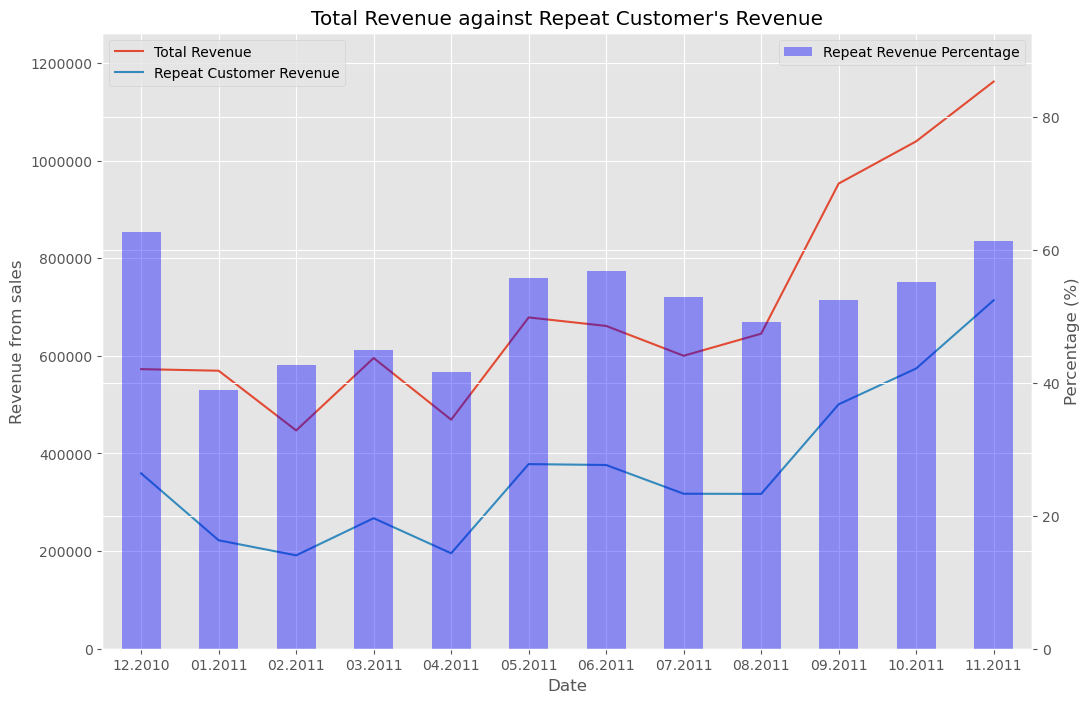

In [66]:

## lets plot these 3 on a chart

ax = pd.DataFrame(monthly_distinct_customer_revenue.values).plot(figsize= (12, 8)) ##montly repeat customer revvenue line

pd.DataFrame(monthly_repeat_customer_revenue.values).plot(ax=ax, grid=True) # add monthly distinct customer on the same figure

ax.set_xlabel('Date')
ax.set_ylabel('Revenue from sales')
ax.set_title("Total Revenue against Repeat Customer's Revenue")

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_distinct_customer_revenue.values) + 100000])

ax.ticklabel_format(useOffset=False, style='plain')


ax2 = ax.twinx()

pd.DataFrame(monthly_revenue_repeat_percentage.values).plot(ax=ax2, kind='bar', grid=True, color='blue', alpha=0.4)

ax2.set_ylabel('Percentage (%)')

ax2.legend(['Repeat Revenue Percentage'])

ax2.set_ylim([0, max(monthly_revenue_repeat_percentage.values) + 30])

ax2.set_xticklabels([x.strftime('%m.%Y') for x in monthly_revenue_repeat_percentage.index])

plt.show()


### Products Analysis

In [67]:
customer_df.head()

,InvoiceNo,StockCode,yearmonth,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year_month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,8,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,201012,WHITE METAL LANTERN,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


In [68]:
## Quantity of each products sold per month

monthly_item_sold = customer_df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

monthly_item_sold.head()

InvoiceDate  StockCode
2010-12-31   10002        224
             10120         16
             10123C         1
             10124A         4
             10124G         5
Name: Quantity, dtype: int64

In [69]:
## lets use the last month of our dataset to track the top selling items

last_month_df = monthly_item_sold.loc['2011-11-30']

last_month_df = last_month_df.reset_index()

last_month_df.sort_values(by='Quantity', ascending=False).head(10) #top 10 selling items

,StockCode,Quantity
2371,84826,12551
1567,23084,12393
827,22197,8458
738,22086,5919
2488,85099B,5678
2385,84879,5190
1135,22578,4981
2498,85123A,4861
1134,22577,4582
2278,84077,4500


In [70]:
## lets see how these top 5 items from 30 November have been performing monthly

Last_Top_5_items_Monthly_performance = customer_df.loc[customer_df['StockCode'].isin(['84826', '23084', '22197', '22086', '85099B'])].set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

Last_Top_5_items_Monthly_performance

InvoiceDate  StockCode
2010-12-31   22086         1697
             22197         2110
             84826          366
             85099B        2056
2011-01-31   22197         1697
             84826          480
             85099B        2625
2011-02-28   22086            2
             22197         2505
             84826           66
             85099B        2971
2011-03-31   22086           85
             22197         2034
             84826           60
             85099B        4924
2011-04-30   22086           11
             22197         1801
             84826            1
             85099B        2211
2011-05-31   22086           12
             22197         6738
             23084         1097
             85099B        3470
2011-06-30   22086          337
             22197         1989
             23084         1621
             84826            1
             85099B        3529
2011-07-31   22086          374
             22197         1787
             2308

In [71]:
## lets generate a monthly trend for the top5 items

trend_items_monthly = Last_Top_5_items_Monthly_performance.reset_index().pivot('InvoiceDate', 'StockCode').fillna(0)

trend_items_monthly = trend_items_monthly.reset_index()
trend_items_monthly = trend_items_monthly.set_index('InvoiceDate')

trend_items_monthly.columns = trend_items_monthly.columns.droplevel(0)

trend_items_monthly

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,1697.0,2110.0,0.0,366.0,2056.0
2011-01-31,0.0,1697.0,0.0,480.0,2625.0
2011-02-28,2.0,2505.0,0.0,66.0,2971.0
2011-03-31,85.0,2034.0,0.0,60.0,4924.0
2011-04-30,11.0,1801.0,0.0,1.0,2211.0
2011-05-31,12.0,6738.0,1097.0,0.0,3470.0
2011-06-30,337.0,1989.0,1621.0,1.0,3529.0
2011-07-31,374.0,1787.0,236.0,2.0,2970.0
2011-08-31,480.0,5286.0,1813.0,72.0,5278.0


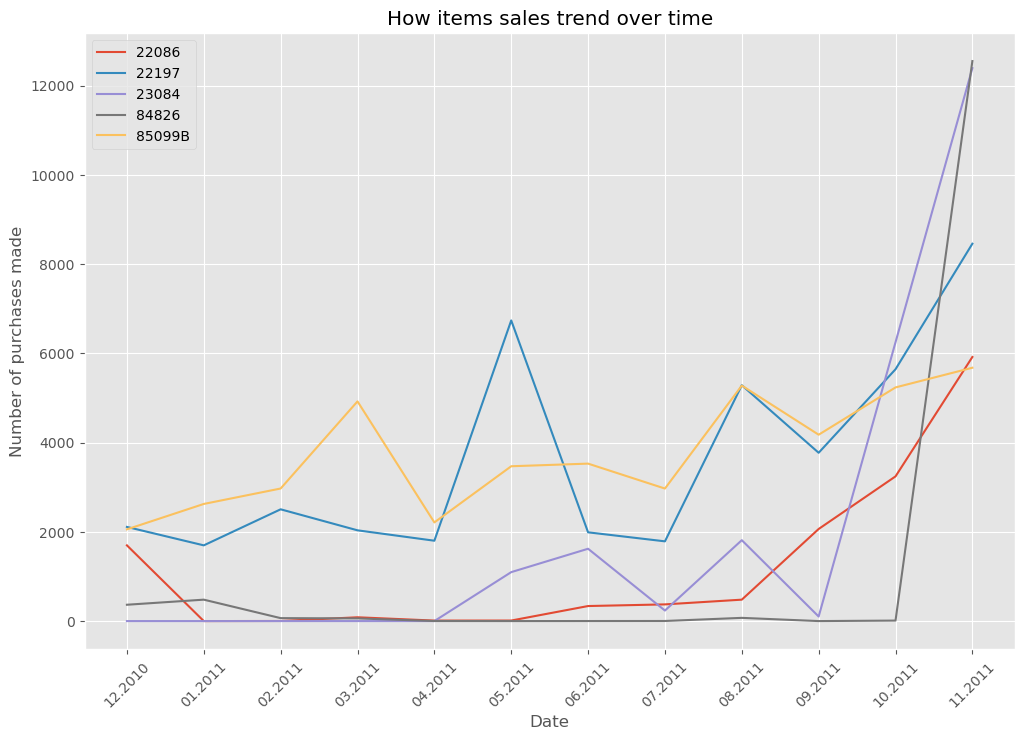

In [72]:
## lets plot this 

ax = pd.DataFrame(trend_items_monthly.values).plot(figsize=(12, 8), grid=True)

ax.set_ylabel('Number of purchases made')
ax.set_xlabel('Date')
ax.set_title('How items sales trend over time')

ax.legend(trend_items_monthly.columns, loc='upper left')

plt.xticks(range(len(trend_items_monthly.index)), [x.strftime('%m.%Y') for x in trend_items_monthly.index], rotation=45)

plt.show()